# Introducción

<font color=green>
    
Realizaremos un análisis de patrones que determina si un juego tendrá éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias para la tienda online ICE.
    
La descripción de datos es la siguiente:

- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)   

Avanzaremos en el siguiente orden:
- 1: Abriré el archivo de datos y estudiaremos la información general.
- 2: Prepararé los datos.
- 3: Analizaré los datos.
- 4: Crearé un perfil de usuario para cada región.
- 5: Probaré hipótesis.
- 6: Escribiré una conclusión general.
    
    
    
</font>

## Inicialización

In [86]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

## Cargar los datos

In [87]:
# Cargar el archivo de datos:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [88]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [89]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [90]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


<font color=green>
Se observa lo siguiente:
    
- Tenemos 11 columnas con 16715 filas.
- Están todas los nombres de las columnas en mayúscula, lo que reemplazaremos a minúscula.
- Las columnas: Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating tienen datos faltantes que habrá que analizar. Además, revisaremos el tipo de las columnas Year_of_Release, Critic_Score, User_score y Rating.
    
</font>

## Reemplazar los nombres de las columnas

In [91]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<font color=green>
Nombre de columnas transformadas en minúsculas.
    
</font>


### Columna 'name'

In [92]:
#Comprobaremos los dos datos faltantes en la columna name
games[games['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<font color=green>
Observamos que ambas filas no tienen nombre, genre, critic_score, user_score, ni rating. A lo que se refiere a ventas, tanto NA, EU y JP, están bastante cercas de 0. 
Como nos falta información importante, que es el nombre, y su % de referencia de información es mínima. Podemos proceder con eliminarlas, sin mayor influencia en nuestro análisis.
    
</font>

In [93]:
# Eliminando las filas por su indice
games = games.dropna(subset=['name'])

# Confirmamos que hayamos eliminado ambas filas
games[games['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Columna 'year_of_release'

In [94]:
games['year_of_release'].isna().sum()

269

<font color=green>
Tenemos un total de 269 datos faltantes en la columna 'year_of_release'
    
</font>

In [95]:
#filtraremos el DataFrame por los NaN de columna year_of_release
release_filtered_nan = games[games['year_of_release'].fillna('x') == 'x']
release_filtered_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<font color=green>
En algunos datos, podemos observar que tenemos juegos con años. Eso podría ser una indicio de que el juego fue lanzado el año anterior. Ejemplo: Madden NFL 2004 fue lanzado en el 2003. Podríamos verificar si es así y si en otras plataformas estaría un año de lanzamiento.
    
    
</font>

In [96]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [97]:
games.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [98]:
games.query('name =="Jet X20"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.0,0.03,NaN,NaN,NaN


In [99]:
#Analizamos los juegos con el año incluido:
names_with_year = games[games['name'].str.contains('20')]
names_with_year[names_with_year['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [100]:
#asignaremos el año:
games.loc[183, 'year_of_release'] = 2003
games.loc[377, 'year_of_release'] = 2003
games.loc[475, 'year_of_release'] = 2005
games.loc[1650, 'year_of_release'] = 2002
games.loc[2492, 'year_of_release'] = 2002
games.loc[2572, 'year_of_release'] = 2008
games.loc[3486, 'year_of_release'] = 2001
games.loc[4775, 'year_of_release'] = 2002
games.loc[5156, 'year_of_release'] = 2002
games.loc[5336, 'year_of_release'] = 2012
games.loc[5655, 'year_of_release'] = 2004
games.loc[5889, 'year_of_release'] = 2002
games.loc[6954, 'year_of_release'] = 2002
games.loc[8918, 'year_of_release'] = 2004
games.loc[13195, 'year_of_release'] = 2010
games.loc[13929, 'year_of_release'] = 2005
games.loc[15953, 'year_of_release'] = 2007
games.loc[16079, 'year_of_release'] = 2006
games.loc[16373, 'year_of_release'] = 2007

In [101]:
games['year_of_release'].isna().sum()

250

<font color=green>
Bajamos la cantidad de valores ausentes, pero aún nos quedan 250 datos a llenar. Lo que podríamos hacer es tomar la mediana de los años de cada plataforma para reemplazar los NaN.
    
    
</font>

In [102]:
games_year_median = games.groupby('platform')['year_of_release'].median()
games_year_median

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2004.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [103]:
# # Creamos la función que nos ayudará a llenar los valores vacíos
def fill_year(platform):
    return games_year_median[platform]

# # Apliquemos la función
games_fill_year = games.apply(lambda row: fill_year(row['platform']), axis=1)
games['year_of_release'] = games['year_of_release'].fillna(games_fill_year)

# Veamos si logramos llenar todos los valores vacíos en yer_of_release
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [104]:
#verificamos si se llenaron todas las columnas en year_of_release
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


<font color=green>
Llenamos todos los valores de la columna year_of_release con las medias, para mantener valores enteros y no nos influirá a una magnitud grande.
    
    
</font>

## Columnas Score y rating

### Columna 'critic_score'

In [105]:
print(f'Valores nan en columna "critic_score":', games['critic_score'].isna().sum())
print('--------------------------------------')
print(f'Porcentaje de valores nan en columna "critic_score":',games['critic_score'].isna().sum()*100/len(games['name']))

Valores nan en columna "critic_score": 8576
--------------------------------------
Porcentaje de valores nan en columna "critic_score": 51.313348890085564


<font color=green>
Tenemos más del 50% de valores ausentes en la columna "critic_score". Analisémosla más a fondo.
    
    
</font>

In [106]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


In [107]:
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Text(0.5, 1.0, 'critic_score boxplot distribution')

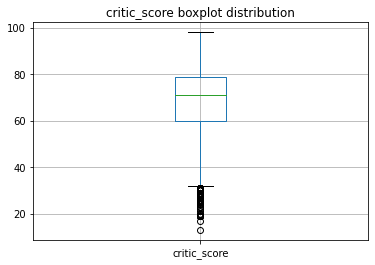

In [108]:
games.boxplot(column='critic_score')
plt.title('critic_score boxplot distribution')

<font color=green>
Tenemos una media de 71 y mediana de 69 que están bastante cerca, con una desviación standard de 14 puntos. Además observamos que tenemos un grupo de datos asimétricos y con un grupo de datos atípicos bajo el bigote inferior. 
    
Utilizaremos la mediana para llenar los valores ausentes.   
    
</font>

In [109]:
games.query('name=="007: Quantum of Solace"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


In [110]:
#Rellenemos los valores posibles para rellenar:
valores_imputs = games.groupby('name')['critic_score'].median().round(0)
games['critic_score'] = games.set_index('name')['critic_score'].fillna(valores_imputs).to_list()

In [111]:
games.query('name=="007: Quantum of Solace"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,65.0,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


In [112]:
games.query('name=="Wheel of Fortune"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1577,Wheel of Fortune,PS,1998.0,Misc,0.99,0.22,0.0,0.04,NaN,NaN,NaN
2124,Wheel of Fortune,Wii,2010.0,Misc,0.86,0.04,0.0,0.06,NaN,7.6,E
2157,Wheel of Fortune,PS2,2004.0,Misc,0.47,0.36,0.0,0.12,NaN,tbd,E
4662,Wheel of Fortune,DS,2010.0,Misc,0.39,0.00,0.0,0.03,NaN,tbd,E
6670,Wheel of Fortune,N64,1997.0,Misc,0.20,0.05,0.0,0.00,NaN,NaN,NaN


In [113]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


<font color=green>
Tenemos datos dificiles de imputar, ya que no tenemos ningún dato adicional de otra plataforma para poder llenarlos con una mediana o media. Por lo tanto, los dejamos de esta forma.    
</font>

### Columna 'user_score'

<font color=green>
Esta columna tiene el puntaje de cada juego según los usuarios calificado de 0 a 10, pero se encuentra ingresada como si fuera str. Esto quiere decir que Python la considera texto y no nos permite realizar el análisis estadístico que necesitamos realizar.
    
Sabemos que ésta columna tiene una calificación de str 'tbd' o sea, por determinar. Aún así, dejaremos estos valores como vacíos, pues nos permitirá tener solo números en esta columna y así podremos aplicar varios otros y útiles métodos.   
</font>

In [114]:
#Tenemos conocimiento que algunos datos de la columna 'usre_score' están como 'tbd'
#Veamos cuantas son

len(games[games['user_score']=='tbd'])

2424

In [115]:
#pasemos los str a float, cambiando los 'tbd' a NaN
# games['user_score'] = pd.to_numeric(games['user_score'], downcast='float', errors='coerce')

def limpieza_user_score(x):
    if pd.isna(x): return None
    if x=='tbd': return None
    return float(x)

games['user_score'] = games['user_score'].apply(limpieza_user_score)

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


In [116]:
#veamos la descripción:
games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Text(0.5, 1.0, 'user_score boxplot distribution')

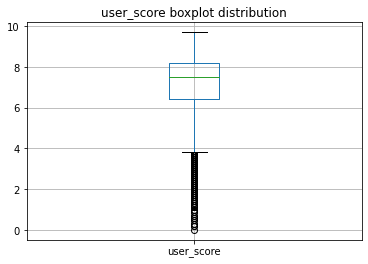

In [117]:
games.boxplot('user_score')
plt.title('user_score boxplot distribution')

<font color=green>
Si bien, podemos ver que la mediana y media son bastante parecidas. Pero observando el diagrama de caja, podemos ver que tenemos muchos valores bajo el bigote inferior, lo que nos indica que tenemos varios valores atípicos.
    
Como hecho en la columna anterior, utilizaremos la mediana para llenar estos valores.     
</font>

In [118]:
games.query('name=="007: Quantum of Solace"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,65.0,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


In [119]:
valores_imputables = games.groupby('name')['user_score'].median().round(0)
games['user_score'] = games.set_index('name')['user_score'].fillna(valores_imputables).to_list()

In [120]:
games.query('name=="007: Quantum of Solace"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,65.0,7.0,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,7.0,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T


In [121]:
games.query('name== "SD Gundam G Generation Genesis"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11255,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,0.0,0.0,0.09,0.0,NaN,NaN,NaN
11297,SD Gundam G Generation Genesis,PS4,2016.0,Strategy,0.0,0.0,0.08,0.0,NaN,NaN,NaN


In [122]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


<font color=green>
Al igual como en la columna 'critic_score', en la columna 'user_score' tenemos valores dificiles de ser imputables, ya que no tenemos más datos de donde tomar una mediana.    
</font>

### Columna 'rating'

In [123]:
#Veamos la cantidad de valores únicos:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<font color=green>
Según lo descrito por ESRB (Entertainment Software Rating Board) existen los siguientes tipos de rating:
    
- E: Everyone; El contenido es apto para todas las edades.
- E10+: Everyone 10+; El contenido generalmente apto para mayores de 10 años.   
- T: Teen; El contenido generalmente apto para mayores de 13 años.     
- M: Mature 17+; El contenido generalmente apto para mayores de 17 años. 
- K-A: Kids to Adults, Se cambió a E en el año 1998.
- AO: Adults Only; El contenido es apto solamente para adultos mayores de 18 años.
- EC: Early Childhood; Contenidos que pueden ser aptos para niños de 3 años o mayores. 
- RP: Raging Pending; Aún no se le ha asignado una clasificación ESRB definitiva.   
</font>

In [124]:
#Veamos cuanto se repite cada una
games['rating'].value_counts(normalize=True)

E       0.401045
T       0.297618
M       0.157101
E10+    0.142728
EC      0.000804
RP      0.000302
K-A     0.000302
AO      0.000101
Name: rating, dtype: float64

In [125]:
print(f'Cantidad de valores ausentes:', len(games[games['rating'].isnull()==True]))
print(f'El porcentaje de datos ausentes:', len(games[games['rating'].isnull()==True])*100/len(games), '%')

Cantidad de valores ausentes: 6764
El porcentaje de datos ausentes: 40.4714892598576 %


<font color=green>
Observamos casi un 41% de datos ausentes en esta columna. Como escrito anteriormente, tenemos ratings que se cambiaron, el K-A a E, lo que haremos a continuación. Además, los datos vacíos los cambiaremos a RP.
</font>

In [126]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].fillna('RP')
games['rating'].value_counts(normalize=True)

RP      0.404894
E       0.238916
T       0.177167
M       0.093520
E10+    0.084964
EC      0.000479
AO      0.000060
Name: rating, dtype: float64

In [127]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


<font color=green>
Completamos los datos vacíos en la columna Rating.
</font>

## Analisis de datos


<font color=green>
Ya completada la limpieza de datos, podemos proseguir con en análisis de estos.
</font>

### Ventas totales

In [128]:
#Primero creamos una nueva columna de ventas totales:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

#reorganicemos nuestras columnas:
games = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]

#Verifiquemos si quedó bien:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,RP
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,RP


### Lanzamientos por año

In [129]:
games_yearly_released = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_yearly_released.columns = ['Nº Juegos estreno anual']
games_yearly_released.sort_values('Nº Juegos estreno anual', ascending = False)

,Nº Juegos estreno anual
year_of_release,
2009.0,1474
2008.0,1457
2010.0,1300
2007.0,1199
2011.0,1161
2006.0,1007
2005.0,941
2002.0,835
2004.0,807


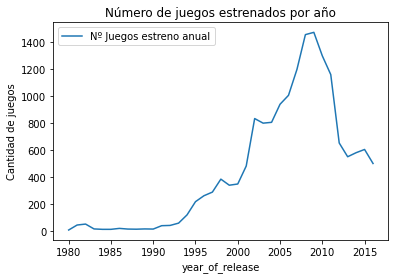

In [130]:
games_yearly_released.plot()
plt.title('Número de juegos estrenados por año')
plt.ylabel('Cantidad de juegos')
plt.show(block=False)

<font color=green>
Observamos que las ventas de videojuegos empezó a aumentar cerca del año 1993. Llegando a un peak entre los año 2008-2009. Llegando al lanzamiento de alrededor de un 50% menos en el año 2014-2016. 
</font>

### Ventas por plataforma

In [131]:
sales_by_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_by_platform.sort_values('total_sales', ascending = False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [132]:
#Calculemos la media y mediana de ventas por plataforma:
print(f'Las ventas media por plataforma es:', sales_by_platform.mean())
print(f'Las ventas mediana por plataforma es:', sales_by_platform.median())

Las ventas media por plataforma es: total_sales    287.525484
dtype: float64
Las ventas mediana por plataforma es: total_sales    200.04
dtype: float64


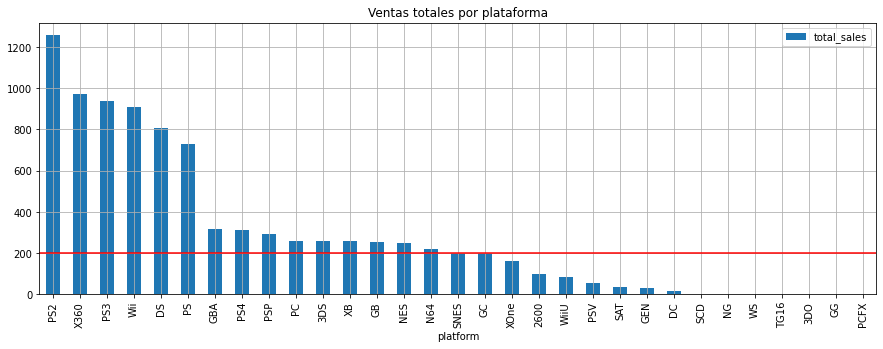

In [133]:
#vamos a ver como se comportan estos datos con un histograma de barras:
sales_by_platform.sort_values('total_sales', ascending = False).plot(kind='bar',figsize=(15,5), grid=True)
# Marquemos la mediana como línea de referencia
plt.hlines(y=200, xmin=-2, xmax=32, color='red')
plt.title('Ventas totales por plataforma')
plt.show()

<font color=green>
Según el histograma de barras, podemos observar que la PS2 es la que más ha vendido anualmente, le siguen la X360, PS3, Wii, DS, PS. Dando un salto bastante a la GBA, PS4, PSP, llegando a la SNES casi justo en la mediana. 

Analizaremos las plataformas más populares: PS2, X360, PS3, Wii
</font>

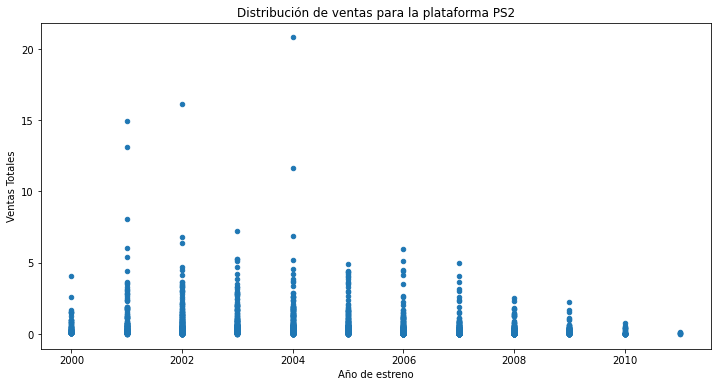

In [134]:
games.query('platform == "PS2"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show()

<font color=green>
Para la plataforma PS2, sin tomar en cuenta los valores elevados, podemos observar que en el año 2000 (su lanzamiento) tuvo ventas de casi 3 millones, llegando a un peak el año 2005 con casi 5 millones de ventas y ya decayendo y empezando a desaparecer hacia el año 2011. Teniendo una vida de 11 años.
</font>

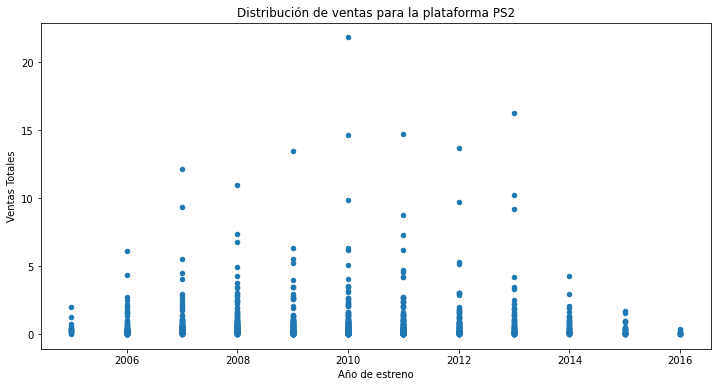

In [135]:
games.query('platform == "X360"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show()

<font color=green>
La plataforma X360 observamos que en su año de lanzamiento (2005) Tuvo una venta total de 2 millones aproximadamente, incrementando lentamente para llegar a su peak el año 2008 con casi 5millones de ventas. Decreciendo y empezando a desaparecer hacia el 2016. Teniendo una vida de 11 años.
</font>

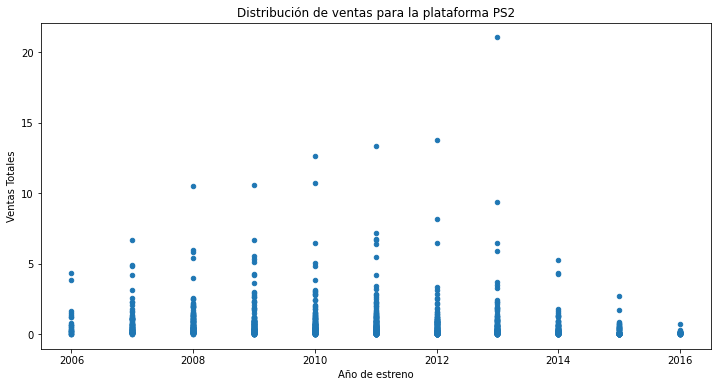

In [136]:
games.query('platform == "PS3"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show()

<font color=green>
La plataforma PS3 observamos que en su año de lanzamiento (2006) tuvo una venta total de 2.5 millones aproximadamente, incrementando para llegar a su peak el año 2011 con casi 4 millones de ventas. Pudiendo mantenerse el total de venta en 2012, pero ya para el 2013 en adelante decreciendo y empezando a desaparecer hacia el 2016. Teniendo una vida de 10 años.
</font>

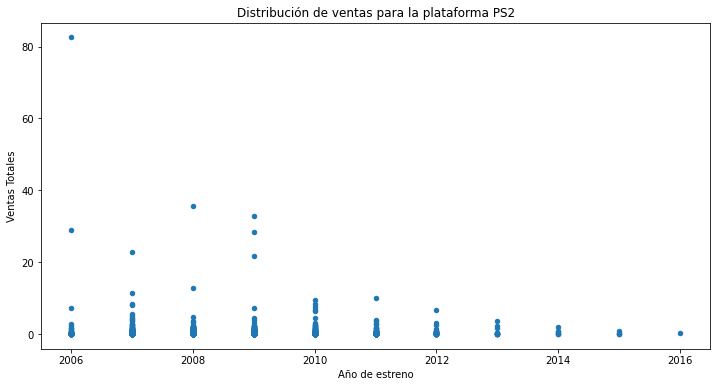

In [137]:
games.query('platform == "Wii"').plot(x='year_of_release', y='total_sales', kind='scatter', figsize=(12,6))
plt.xlabel('Año de estreno')
plt.ylabel('Ventas Totales')
plt.title('Distribución de ventas para la plataforma PS2')
plt.show()

<font color=green>
La plataforma Wii observamos que en su año de lanzamiento 2006, tuvo un comportamiento parecido a las otras consolas visto anteriormente. Manteniéndose un poco más pareja al largo del tiempo hasta aproximadamente el 2012 ya decreciendo hacia el 2016. Teniendo una vida de 10 años.
        
</font>

<font color=green>
Revisemos cada cuánto sale una nueva plataforma, tomando en cuenta las últimas tienen una vida de 10 años, haremos un intervalo de 4 años
</font>

In [138]:
# Creamos los nuevos Dataframes con una simple condición
games_12 = games[games['year_of_release']>=2005].reset_index(drop=True)
games_8 = games[games['year_of_release']>=2009].reset_index(drop=True)
games_4 = games[games['year_of_release']>=2013].reset_index(drop=True)

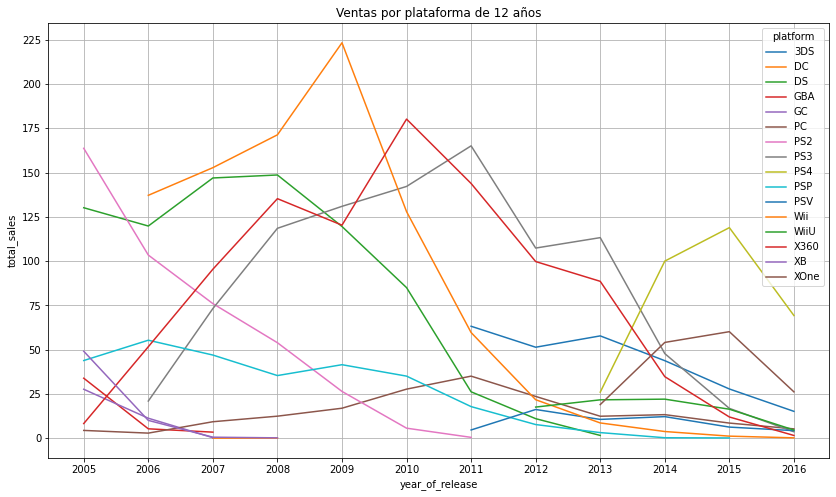

In [139]:
# Grafiquemos el mercado los últimos 12 años
fig,ax=plt.subplots(1,1,figsize=(14,8))
games_12.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax, grid=True)
plt.xticks(range(2005, 2017, 1))
plt.yticks(range(0,250,25))
plt.ylabel('total_sales')
plt.title('Ventas por plataforma de 12 años')
plt.show()

<font color=green>
Podemos observar que casi toda plataforma comienza con muy buenas ventas en su lanzamiento. Manteniendolas durante 3 a 4 años, después empezando a declinarse, hasta que salga una nueva plataforma/consola.
</font>

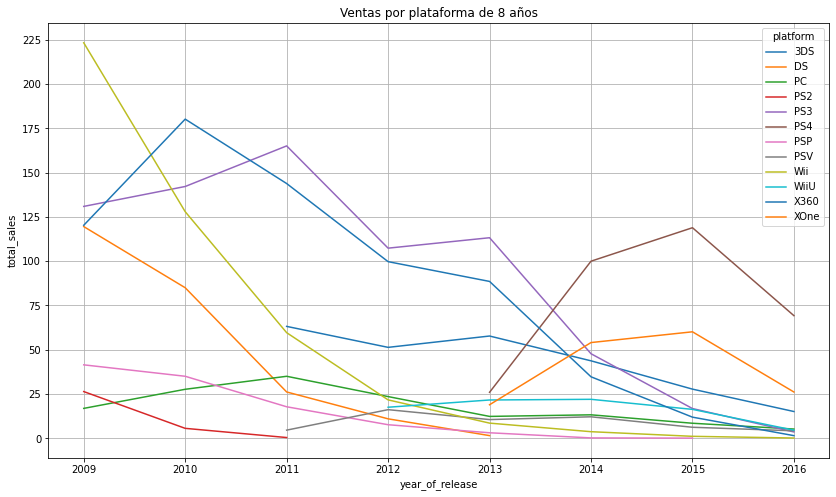

In [141]:
# Grafiquemos el mercado los últimos 8 años
fig,ax=plt.subplots(1,1,figsize=(14,8))
games_8.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax, grid=True)
plt.xticks(range(2009, 2017, 1))
plt.yticks(range(0,250,25))
plt.ylabel('total_sales')
plt.title('Ventas por plataforma de 8 años')
plt.show()

<font color=green>
Podemos seguir observando lo mismo que anteriormente. Aunque la Wii tuvo una buena recepción y venta instantánea a su lanzamiento, fue decayendo rápidamente. No pudiendo cumplir el mismo éxito la WiiU, por ejemplo, en el año 2012.
</font>

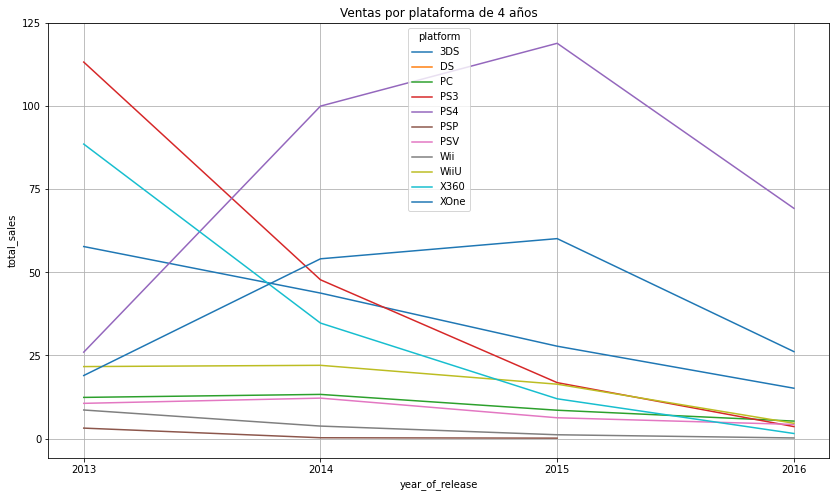

In [143]:
# Grafiquemos el mercado los últimos 4 años
fig,ax=plt.subplots(1,1,figsize=(14,8))
games_4.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax, grid=True)
plt.xticks(range(2013, 2017, 1))
plt.yticks(range(0,140,25))
plt.ylabel('total_sales')
plt.title('Ventas por plataforma de 4 años')
plt.show()

<font color=green>
En nuestro último segmento, podemos observar que la "pelea" está entre las dos consolas PS4 y XOne, pero ambas, desde el año 2015, están decayendo.
    
Para el futuro ocuparemos estos últimos 4 años, ya que son lo más actual del mercado. Los años anteriores nos ayudan a entender la fluctuación del mercado, pero no nos predecirá el futuro.    
</font>

### Ventas de juegos por plataforma

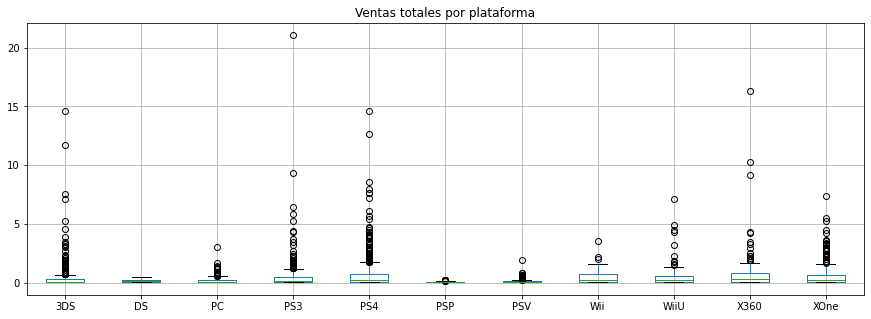

In [144]:
games_4_sales = games_4.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
games_4_sales.boxplot(figsize=(15,5))
plt.title('Ventas totales por plataforma')
plt.show()

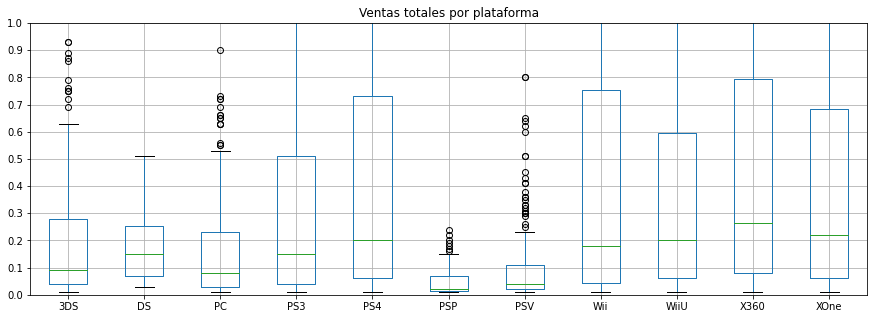

In [145]:
#Enfoquemos para ver mejor estas cajas
games_4_sales.boxplot(figsize=(15,5))
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)
plt.title('Ventas totales por plataforma')
plt.show()

<font color=green>
Tenemos varias plataformas con ventas atípicas. Podrían ser los éxitos de venta de cada plataforma. 
</font>

<font color=green>
Revisemos cuáles fueron los juegos que lograron una venta cerca de los 15millones: 
</font>

In [146]:
games_4_sales[(games_4_sales['PS3']==games_4_sales['PS3'].max())|
          (games_4_sales['3DS']==games_4_sales['3DS'].max())|
          (games_4_sales['PS4']==games_4_sales['PS4'].max())|
          (games_4_sales['X360']==games_4_sales['X360'].max())|
          (games_4_sales['PC']==games_4_sales['PC'].max())]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Call of Duty: Black Ops 3,NaN,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.70,7.39
Grand Theft Auto V,NaN,NaN,1.17,21.05,12.62,NaN,NaN,NaN,NaN,16.27,5.47
Pokemon X/Pokemon Y,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Sims 4,NaN,NaN,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=green>
Notamos que el juego Gran Theft Auto V es el juego con mayor venta en PS3 y X360, acercándose la PS4 también. 
</font>

In [147]:
games_4['total_sales'].describe()

count    2242.000000
mean        0.487128
std         1.232943
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

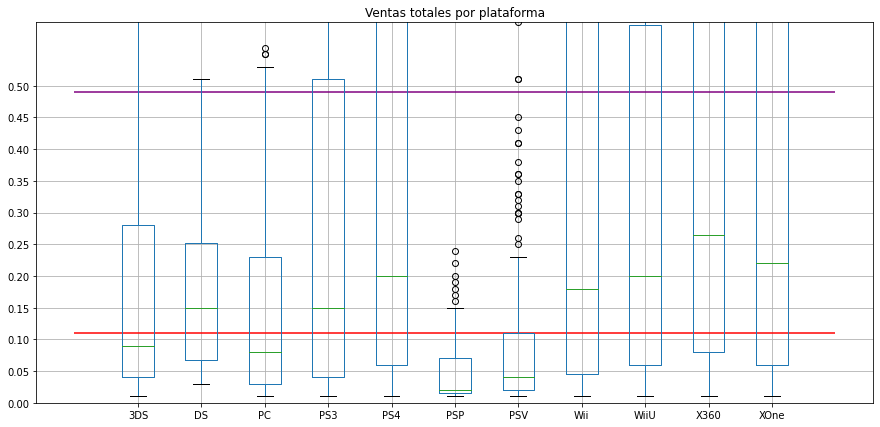

In [148]:
games_4_sales.boxplot(figsize=(15,7))
plt.ylim(0,0.6)
plt.yticks(np.arange(0, 0.51, step=0.05))
# Marquemos la mediana en rojo
plt.hlines(0.11, xmin=0,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(0.49, xmin=0,xmax=12, color='purple')
plt.title('Ventas totales por plataforma')
plt.show()

In [149]:
# Veamos los dato estadísticos de cada plataforma
games_4_sales.describe()



platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,311.000000,8.000000,189.000000,345.000000,392.000000,67.000000,359.000000,23.000000,115.000000,186.000000,247.000000
mean,0.464437,0.192500,0.208624,0.525884,0.801378,0.052239,0.092618,0.593913,0.562000,0.735484,0.645020
std,1.364530,0.172026,0.352304,1.451939,1.609456,0.059768,0.153857,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


<font color=green>
El promedio observado de las plataformas son bastante diferentes. Esto se debe a que tenemos valores atípicos dentro de nuestros datos. Podríamos limpiarlos, pero no nos serviría para nuestro análisis.
    
Si nos fijamos entre las medias y medianas de cada plataforma, estas son bastante diferentes. Excepto el caso de la plataforma DS, que tiene una media y mediana bastante cercana. Podría deberse a que ésta plataforma no haya sacado tantos juegos en los últimos años.

La media más alta la tiene PS4, llevandose la mediana más alta X360 seguido por XOne. Podríamos decir que los juegos de la plataforma de Microsoft XBox tiene más ventas que su competencia PlayStation, con menos juegos que rompan la norma y sean éxitos rotundos.

</font>

### Calificación por usuario

<font color=green>
Ahora veamos la calificación por usuario y como se correlaciona con la plataforma y su venta.
</font>

In [150]:
games_4['user_score'].describe()

count    1373.000000
mean        6.602622
std         1.618864
min         0.200000
25%         5.800000
50%         7.000000
75%         7.900000
max         9.300000
Name: user_score, dtype: float64

In [151]:
#Creamos la tabla y veamos la distribución
games_4_user_score = games_4.pivot_table(index='name',columns='platform', values='user_score', aggfunc='sum')
games_4_user_score.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,311.000000,8.000000,189.000000,345.000000,392.000000,67.000000,359.000000,23.000000,115.000000,186.000000,247.000000
mean,2.321865,2.975000,5.194709,4.045797,5.039031,0.473134,2.534262,4.339130,5.420870,5.053763,5.513765
std,3.372800,2.485242,2.841781,3.390092,3.245376,1.781435,3.624786,2.439959,3.250465,2.667444,2.768326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,3.500000,3.500000,4.000000,4.950000
50%,0.000000,4.400000,6.100000,4.800000,6.450000,0.000000,0.000000,5.000000,6.800000,5.800000,6.400000
75%,6.000000,5.000000,7.400000,7.200000,7.700000,0.000000,7.100000,6.000000,7.900000,7.200000,7.500000
max,9.000000,5.000000,9.300000,9.100000,9.200000,8.300000,9.300000,8.400000,9.100000,8.700000,9.200000


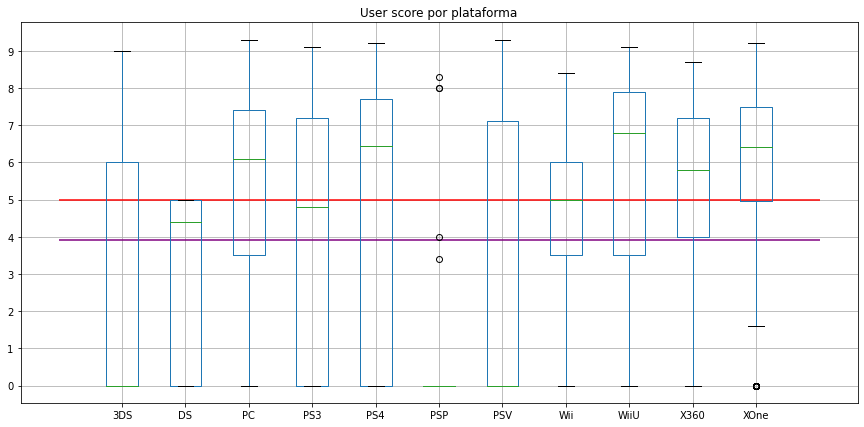

In [152]:
games_4_user_score.boxplot(figsize=(15,7))
plt.yticks(np.arange(0, 10, step=1))
# Marquemos la mediana en rojo
plt.hlines(5, xmin=0,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(3.9, xmin=0,xmax=12, color='purple')
plt.title('User score por plataforma')
plt.show()

In [153]:
# Veamos el mejor puntaje en los juegos según el score de los usuarios
games_4[games_4['user_score']==games_4['user_score'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
355,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,0.21,0.46,0.00,0.05,0.72,93.0,9.3,M
1219,Steins;Gate 0,PSV,2015.0,Adventure,0.00,0.03,0.05,0.01,0.09,86.0,9.3,M


<font color=green>
Sopresivamente uno de los dos juegos mejor catalogados es de la plataforma PSV y el otro es de la plataforma PC, estando empatados.

</font>

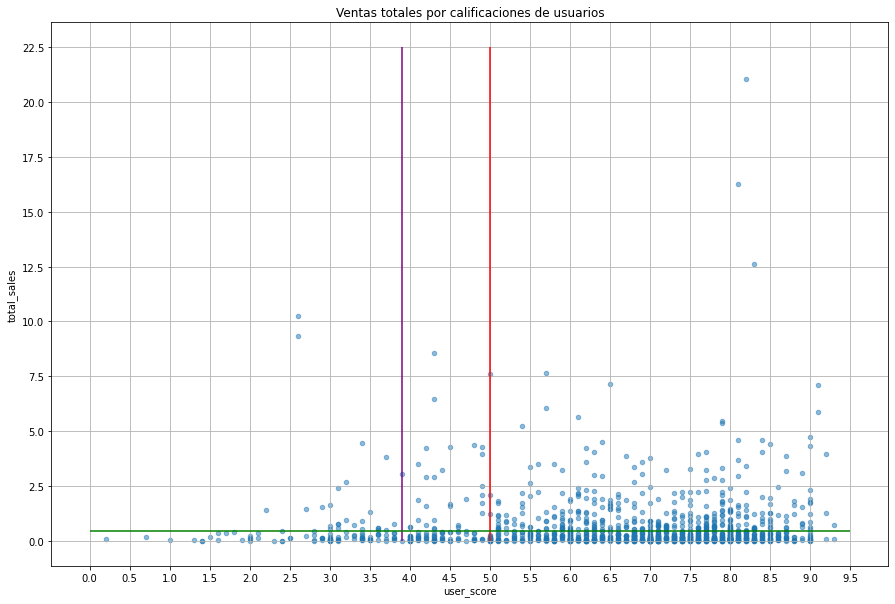

In [154]:
#Veamos como se correlacionan estos valores con las ventas
games_4.plot.scatter(x='user_score', y= 'total_sales', figsize=(15,10), alpha=0.5, grid=True)
plt.yticks(np.arange(0, 25, step=2.5))
plt.xticks(np.arange(0, 11, step=0.5))
# Marquemos la mediana de calificación en rojo
plt.vlines(5, ymin=0,ymax=22.5, color='red')
# Marquemos la media de calificación en morado
plt.vlines(3.9, ymin=0,ymax=22.5, color='purple')
# Marquemos la media de las ventas en verde
plt.hlines(0.48, xmin=0,xmax=9.5, color='green')
plt.title('Ventas totales por calificaciones de usuarios')
plt.show()



In [155]:
games_4['user_score'].corr(games_4['total_sales'])

0.009766635223049458

<font color=green>
Veamos en detalle la plataforma PC antes de hacer nuestra conclusión.
</font>

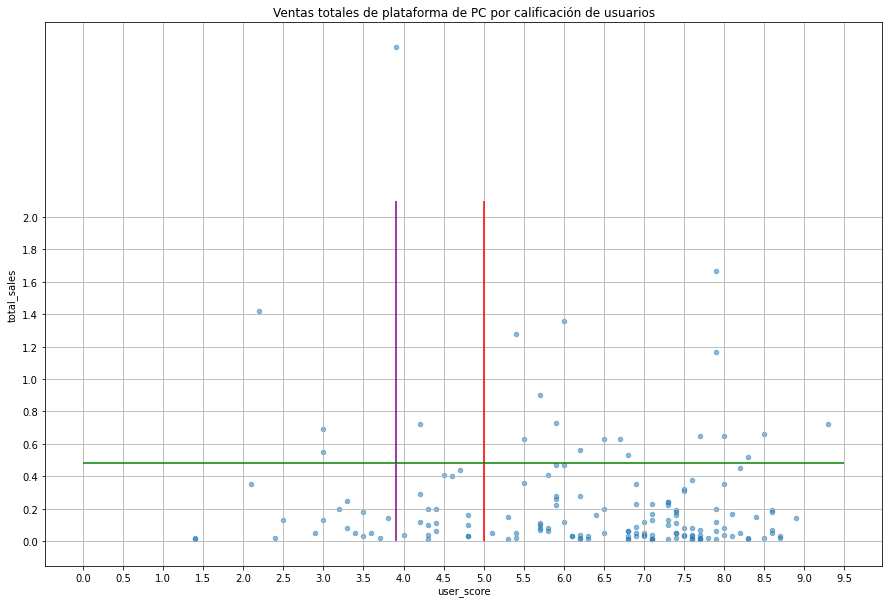

In [157]:
games_4[games_4['platform']=='PC'].plot.scatter(x='user_score', y= 'total_sales', figsize=(15,10), alpha=0.5, grid=True)
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.xticks(np.arange(0, 11, step=0.5))
# Marquemos la mediana de calificación en rojo
plt.vlines(5, ymin=0,ymax=2.1, color='red')
# Marquemos la media de calificación en morado
plt.vlines(3.9, ymin=0,ymax=2.1, color='purple')
# Marquemos la media de las ventas en verde
plt.hlines(0.48, xmin=0,xmax=9.5, color='green')
plt.title('Ventas totales de plataforma de PC por calificación de usuarios')
plt.show()



In [158]:
games_4[games_4['platform']=='PC']['user_score'].corr(games_4[games_4['platform']=='PC']['total_sales'])

-0.10852472315670199

<font color=green>
No se puede observar ninguna correlación significativa entre estas variables. Aunque los juegos más más vendidos están bien puntuados, no sol los mejores puntados. Si nos fijamos en la plataforma con los juegos mejores puntuados, podemos ver que la gran mayoría de ellos se encuentra bajo el promedio en ventas.

Con esta información, no podemos concluir que existe una correlación entre la calificación de los usuarios y el total de ventas de un juego.


</font>

### Calificación por críticos

<font color=green>
Repitamos el proceso de análisis para la columna de critic_score.


</font>

In [159]:
games_4['critic_score'].describe()

count    1329.000000
mean       71.975169
std        13.396586
min        13.000000
25%        66.000000
50%        74.000000
75%        81.000000
max        97.000000
Name: critic_score, dtype: float64

In [160]:
#Creamos la tabla y veamos la distribución
games_4_critic = games_4.pivot_table(index='name', columns='platform', values='critic_score', aggfunc='sum')
games_4_critic.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,311.000000,8.000000,189.000000,345.000000,392.000000,67.000000,359.000000,23.000000,115.000000,186.000000,247.000000
mean,22.102894,34.500000,60.925926,43.631884,52.877551,5.791045,23.894150,49.391304,51.747826,55.091398,60.360324
std,33.081556,31.496031,31.291267,36.349732,34.142627,20.599748,34.204935,33.027178,33.969760,32.384468,30.876421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,33.500000,55.000000
50%,0.000000,40.000000,74.000000,60.000000,69.000000,0.000000,0.000000,51.000000,68.000000,70.000000,74.000000
75%,59.000000,54.250000,81.000000,76.000000,79.000000,0.000000,67.000000,74.500000,77.500000,80.000000,81.000000
max,92.000000,81.000000,96.000000,97.000000,97.000000,87.000000,93.000000,87.000000,96.000000,97.000000,97.000000


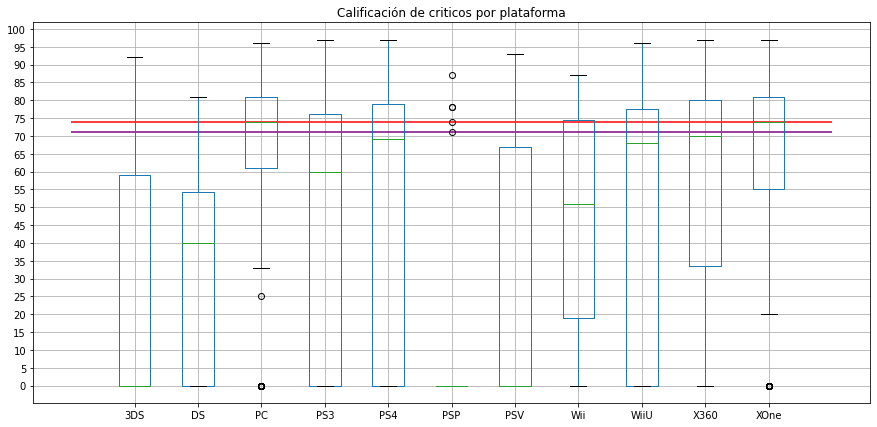

In [161]:
games_4_critic.boxplot(figsize=(15,7))
plt.yticks(np.arange(0, 101, step=5))
# Marquemos la mediana en rojo
plt.hlines(74, xmin=0,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(71, xmin=0,xmax=12, color='purple')
plt.title('Calificación de criticos por plataforma')
plt.show()

<font color=green>
Podemos apreciar que la gran mayoría de las critic_score están por debajo de la media y mediana. Las que coinciden con la mediana son de la plataforma PC y XOne. Las que se acercan a la media son PS4 y X360, seguidos por la WiiU.
</font>

In [162]:
# Veamos los juegos mejores puntuados
games_4[games_4['critic_score']==games_4['critic_score'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
22,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,5.47,97.0,7.9,M


<font color=green>
El mejor calificado por los críticos es el mismo en 4 plataformas, con 97.0 puntos
</font>

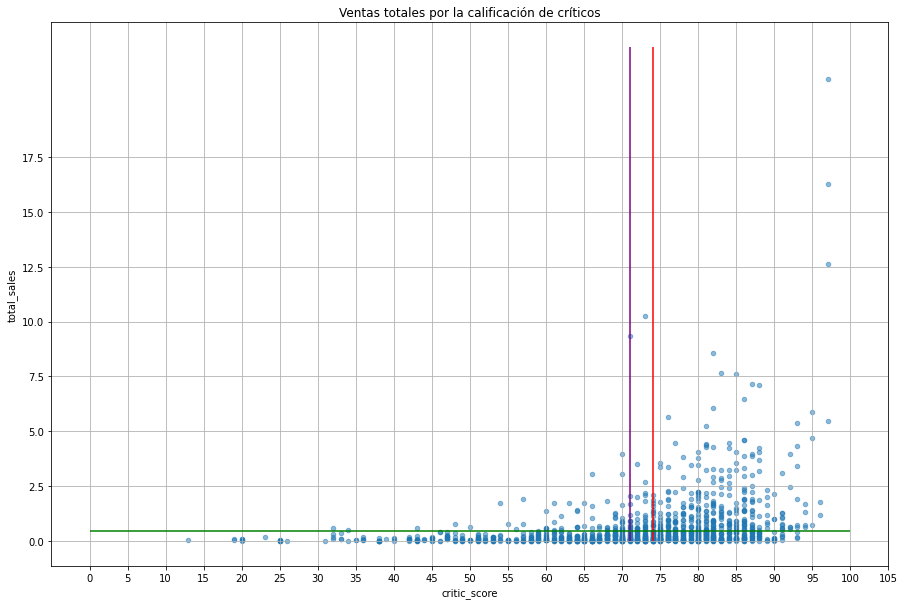

In [163]:
#Veamos como se correlacionan estos valores con las ventas
games_4.plot.scatter(x='critic_score', y= 'total_sales', figsize=(15,10), alpha=0.5, grid=True)
plt.yticks(np.arange(0, 20, step=2.5))
plt.xticks(np.arange(0, 1000, step=5))
# Marquemos la mediana de calificación en rojo
plt.vlines(74, ymin=0,ymax=22.5, color='red')
# Marquemos la media de calificación en morado
plt.vlines(71, ymin=0,ymax=22.5, color='purple')
# Marquemos la media de las ventas en verde
plt.hlines(0.48, xmin=0,xmax=100, color='green')
plt.title('Ventas totales por la calificación de críticos')
plt.show()

<font color=green>
Logramos observar que tenemos una gran densidad de calificaciones de críticos por debajo de la media de ventas totales. Y están más concentrados por sobre la media y mediana de las calificaciones. Si hay valores superiores a la venta total media, pero no es la mayor cantidad.
</font>

In [76]:
games_4['critic_score'].corr(games_4['total_sales'])

0.297681799380716

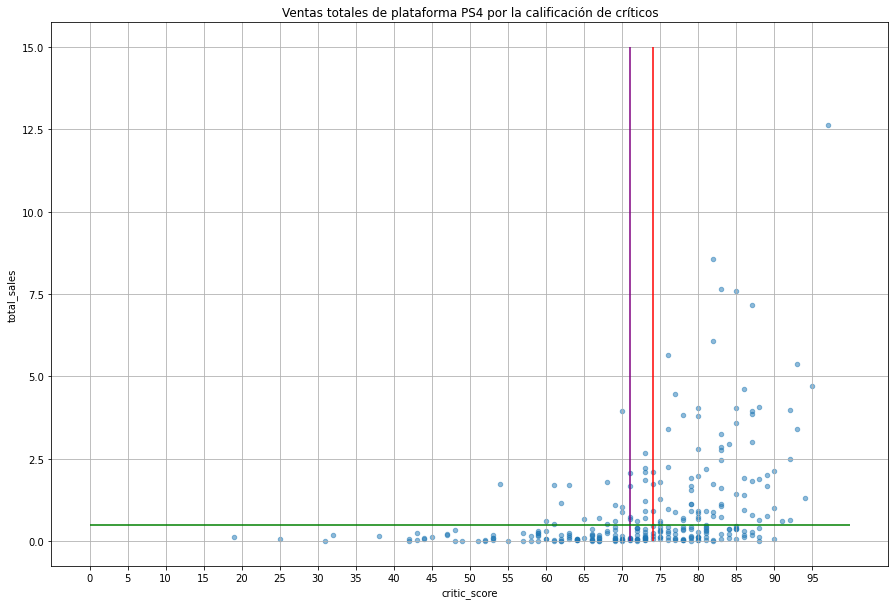

In [164]:
games_4[games_4['platform']=='PS4'] .plot.scatter(x='critic_score', y= 'total_sales', figsize=(15,10), alpha=0.5, grid=True)
plt.yticks(np.arange(0, 16, step=2.5))
plt.xticks(np.arange(0, 100, step=5))
# Marquemos la mediana de calificación en rojo
plt.vlines(74, ymin=0,ymax=15, color='red')
# Marquemos la media de calificación en morado
plt.vlines(71, ymin=0,ymax=15, color='purple')
# Marquemos la media de las ventas en verde
plt.hlines(0.48, xmin=0,xmax=100, color='green')
plt.title('Ventas totales de plataforma PS4 por la calificación de críticos')
plt.show()

<font color=green>
Como observado en el gráfico anterior, filtrando por plataforma PS4, los datos muestran algo parecido. Mayor concentración debajo de la media de ventas totales. En cambio, tenemos una distribución casi parecida en tema de puntuación. No está tan notorio distribuido por encima de la media y mediana de la calificación de críticos.   
</font>

In [165]:
games_4[games_4['platform']=='PS4']['critic_score'].corr(games_4[games_4['platform']=='PS4']['total_sales'])

0.3908008189603602

<font color=green>
La información presentada no nos lleva a concluir que la calificación de un juego esté correlacionado con el total de ventas del juego.    
</font>

### Ventas por género

In [166]:
games_4['genre'].describe()

count       2242
unique        12
top       Action
freq         767
Name: genre, dtype: object

In [167]:
#Creamos la tabla y veamos la distribución
games_4_genre = games_4.pivot_table(columns='genre', index='name', values='total_sales', aggfunc='sum')
games_4_genre.describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,403.000000,180.000000,47.000000,102.000000,37.000000,12.000000,37.000000,209.000000,77.000000,50.000000,76.000000,42.000000
mean,0.799677,0.131833,0.751277,0.615882,1.152162,0.264167,1.080541,0.699426,3.026623,0.445000,1.982500,0.240000
std,3.173333,0.366517,1.943517,2.528428,1.361252,0.369089,1.533962,1.812333,5.338276,0.984812,3.743394,0.395018
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000
25%,0.030000,0.020000,0.055000,0.030000,0.190000,0.027500,0.090000,0.060000,0.110000,0.030000,0.162500,0.030000
50%,0.110000,0.030000,0.170000,0.090000,0.580000,0.090000,0.420000,0.160000,1.130000,0.070000,0.505000,0.085000
75%,0.410000,0.070000,0.520000,0.275000,1.730000,0.285000,1.470000,0.480000,3.490000,0.337500,1.450000,0.247500
max,56.580000,2.920000,12.420000,24.160000,6.000000,1.190000,7.090000,14.600000,27.390000,5.220000,17.370000,1.730000


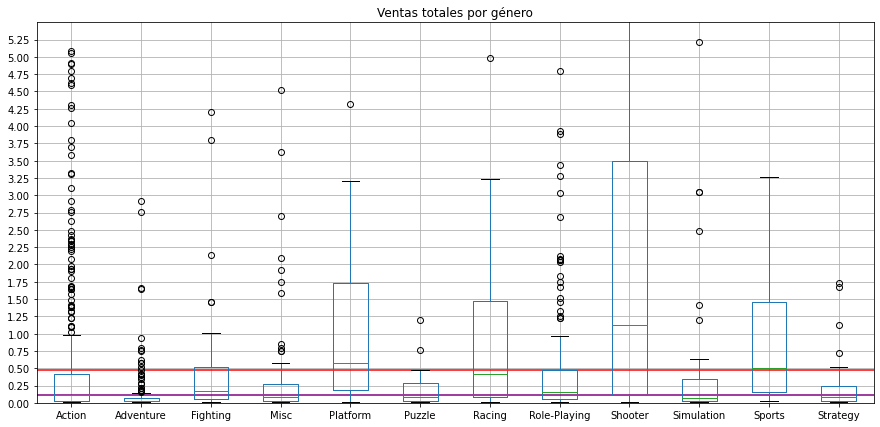

In [168]:
#creamos un gráfico con múltiples cajas
games_4_genre.boxplot(figsize=(15,7))
plt.ylim(0,5.5)
plt.yticks((np.arange(0, 5.5, step=0.25)))
# Marquemos la mediana en rojo
plt.hlines(0.48, xmin=0.5,xmax=12.5, color='red')
# Marquemos la media en morado
plt.hlines(0.11, xmin=0.5,xmax=12.5, color='purple')
plt.title('Ventas totales por género')
plt.show()

<font color=green>
Al observar, vemos que tenemos 4 generos que sobresalen. Estos son:

- Shooter
- Platform
- Racing
- Sports

Las nombradas recién, tienen la mayoría de ventas de juegos, sobre los restos. Pudríamos decir que el éxito de ventas es mayor entre estas categorías. Una probable explicación sería que las altas ventas es por la existencia de juegos que pertenecen a largas sagas que se expanden a través de varias generaciones de consolas.

Por otro lado, tenemos el género 'Action' que, si bien no tiene excelentes ventas, tiene la mayor cantidad de juegos que se escapan de la norma y resultan ser éxitos inesperados. (Valores atípicos). Siendo que el juego con mayor venta y calificación es el GTAV, que corresponde a éste género.
</font>

<font color=green>
Hemos analizado la venta en general, ahora analizaremos por región.
</font>

## Análisis por región

<font color=green>
Las regiones a analizar son:

- NA (North America)
- EU (Europe)
- JP (Japan)
</font>

### NA

In [169]:
games_4['na_sales'].describe()

count    2242.000000
mean        0.195656
std         0.546687
min         0.000000
25%         0.000000
50%         0.020000
75%         0.150000
max         9.660000
Name: na_sales, dtype: float64

<font color=green>
Tenemos varios valores ausentes. Ya que hay juegos que no se han vendido en NA. No tomaremos en cuenta estos valores, ya que cambiarán los resultados de nuestro análisis.
</font>

In [170]:
games_4_na = games_4[games_4['na_sales']!=0]
print(f'Porcentaje de juegos lanzados en NA:', len(games_4_na)*100/len(games_4),'%')

Porcentaje de juegos lanzados en NA: 58.697591436217664 %


In [171]:
games_4_na['na_sales'].describe()

count    1316.000000
mean        0.333328
std         0.680734
min         0.010000
25%         0.040000
50%         0.110000
75%         0.340000
max         9.660000
Name: na_sales, dtype: float64

In [172]:
#Filtrado por plataforma
games_4_na.pivot_table(index='name', columns='platform', values='na_sales', aggfunc='sum').describe()

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,125.000000,4.000000,84.000000,211.000000,294.000000,95.000000,14.000000,92.000000,170.000000,227.000000
mean,0.312320,0.142500,0.132262,0.300948,0.369864,0.054211,0.468571,0.317500,0.480353,0.410220
std,0.740961,0.089954,0.164810,0.640585,0.648368,0.052866,0.582513,0.510558,1.059275,0.647446
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.090000,0.037500,0.050000,0.040000,0.020000,0.062500,0.050000,0.060000,0.050000
50%,0.090000,0.160000,0.085000,0.110000,0.110000,0.040000,0.150000,0.170000,0.170000,0.150000
75%,0.230000,0.212500,0.150000,0.330000,0.407500,0.080000,0.845000,0.335000,0.480000,0.425000
max,5.280000,0.220000,1.000000,7.020000,6.030000,0.320000,1.880000,3.150000,9.660000,4.590000


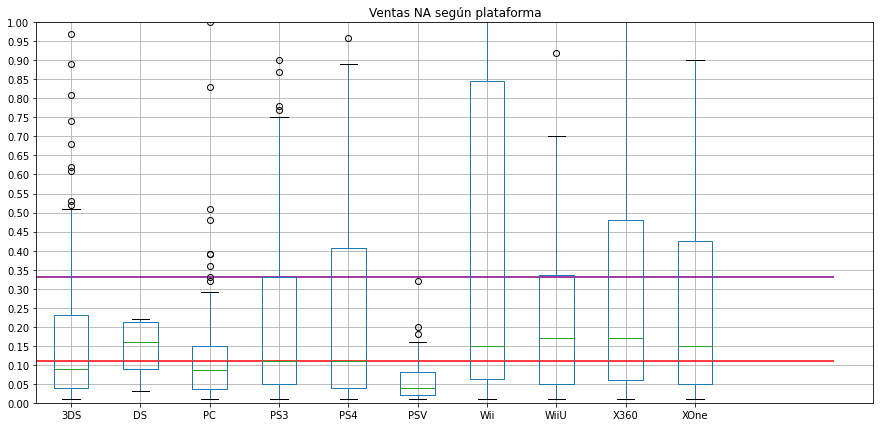

In [173]:
games_4_na.pivot_table(index='name', columns='platform', values='na_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,1)
plt.yticks((np.arange(0, 1.01, step=0.05)))
# Marquemos la mediana en rojo
plt.hlines(0.11, xmin=0.5,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(0.33, xmin=0.5,xmax=12, color='purple')
plt.title('Ventas NA según plataforma')
plt.show()

In [174]:
#filtrado por genero
games_4_na.pivot_table(index='name', columns='genre', values='na_sales', aggfunc='sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,188.000000,38.000000,29.000000,40.000000,32.000000,4.000000,30.000000,110.000000,71.000000,18.000000,51.000000,15.000000
mean,0.671436,0.190000,0.536207,0.687250,0.566875,0.207500,0.434667,0.422818,1.546197,0.295556,1.279804,0.218667
std,1.928421,0.264217,1.181075,1.874956,0.689443,0.222317,0.668688,0.936364,2.732753,0.307671,1.713200,0.271711
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.060000,0.020000,0.010000,0.020000,0.010000,0.010000,0.020000
25%,0.040000,0.032500,0.060000,0.060000,0.117500,0.060000,0.072500,0.050000,0.115000,0.065000,0.180000,0.075000
50%,0.155000,0.095000,0.120000,0.120000,0.450000,0.120000,0.150000,0.100000,0.700000,0.190000,0.390000,0.120000
75%,0.742500,0.220000,0.400000,0.347500,0.710000,0.267500,0.600000,0.277500,1.710000,0.450000,1.320000,0.170000
max,23.840000,1.320000,5.870000,11.280000,3.400000,0.530000,3.150000,5.550000,14.940000,1.000000,5.840000,0.850000


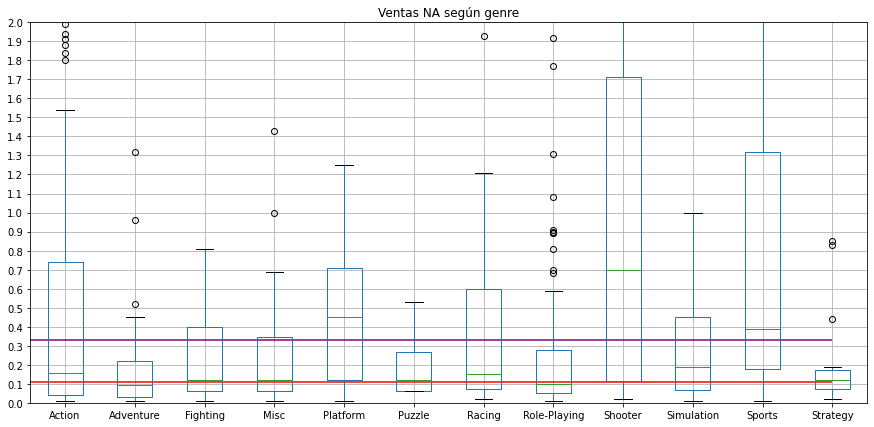

In [175]:
games_4_na.pivot_table(index='name', columns='genre', values='na_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,2)
plt.yticks((np.arange(0, 2.01, step=0.1)))
# Marquemos la mediana en rojo
plt.hlines(0.11, xmin=0.5,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(0.33, xmin=0.5,xmax=12, color='purple')
plt.title('Ventas NA según genre')
plt.show()

#### Conclusión
<font color=green>
Podemos observar que el usuario en NA prefiere la X360, seguido de la DS, WiiU, Wii y XOne a lo que se refiere en plataformas. En género prefieren por mayoría, el Shooter, Seguido por Platform y Sports. Después le siguen los generos Simulation, Action y Racing.
</font>

### EU

In [176]:
games_4['eu_sales'].describe()

count    2242.000000
mean        0.175062
std         0.511518
min         0.000000
25%         0.000000
50%         0.030000
75%         0.130000
max         9.090000
Name: eu_sales, dtype: float64

<font color=green>
Tenemos varios valores ausentes. Ya que hay juegos que no se han vendido en EU. No tomaremos en cuenta estos valores, ya que cambiarán los resultados de nuestro análisis.
</font>

In [177]:
games_4_eu = games_4[games_4['eu_sales']!=0]
print(f'Porcentaje de juegos lanzados en EU:', len(games_4_eu)*100/len(games_4),'%')

Porcentaje de juegos lanzados en EU: 63.559322033898304 %


In [178]:
games_4_eu['eu_sales'].describe()

count    1425.000000
mean        0.275432
std         0.619763
min         0.010000
25%         0.030000
50%         0.090000
75%         0.260000
max         9.090000
Name: eu_sales, dtype: float64

In [179]:
#filtrado por plataforma
games_4_eu.pivot_table(index='name', columns='platform', values='eu_sales', aggfunc='sum').describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,124.000000,8.000000,187.000000,212.000000,290.000000,2.000000,97.000000,22.000000,96.000000,169.000000,218.000000
mean,0.251371,0.106250,0.135615,0.319858,0.486517,0.085000,0.063402,0.269545,0.206771,0.251598,0.236651
std,0.565937,0.080167,0.212699,0.816080,0.909785,0.091924,0.096619,0.348869,0.312327,0.559820,0.380364
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.020000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.037500,0.025000,0.030000,0.050000,0.052500,0.020000,0.042500,0.030000,0.040000,0.030000
50%,0.080000,0.095000,0.060000,0.115000,0.160000,0.085000,0.030000,0.105000,0.100000,0.110000,0.090000
75%,0.202500,0.140000,0.135000,0.300000,0.450000,0.117500,0.060000,0.400000,0.235000,0.260000,0.240000
max,4.190000,0.260000,1.820000,9.090000,6.310000,0.150000,0.640000,1.390000,2.150000,5.140000,2.190000


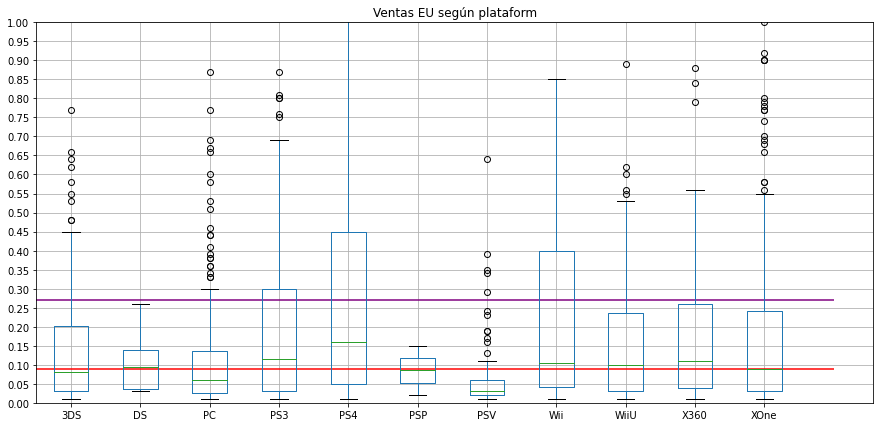

In [180]:
games_4_eu.pivot_table(index='name', columns='platform', values='eu_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,1)
plt.yticks((np.arange(0, 1.01, step=0.05)))
# Marquemos la mediana en rojo
plt.hlines(0.09, xmin=0.5,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(0.27, xmin=0.5,xmax=12, color='purple')
plt.title('Ventas EU según plataform')
plt.show()

In [181]:
#filtrado por genero
games_4_eu.pivot_table(index='name', columns='genre', values='eu_sales', aggfunc='sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,209.000000,42.000000,27.000000,40.000000,30.000000,7.000000,32.000000,101.000000,68.000000,31.000000,53.000000,24.000000
mean,0.566124,0.196429,0.316667,0.501000,0.519333,0.142857,0.630937,0.366535,1.292353,0.352258,1.141887,0.175833
std,1.779348,0.327048,0.531160,1.415708,0.513406,0.199308,0.678853,0.851637,2.039839,0.569454,2.796338,0.197086
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000
25%,0.030000,0.020000,0.020000,0.040000,0.115000,0.015000,0.080000,0.030000,0.160000,0.020000,0.100000,0.040000
50%,0.100000,0.065000,0.120000,0.090000,0.385000,0.030000,0.390000,0.080000,0.450000,0.090000,0.260000,0.110000
75%,0.510000,0.215000,0.295000,0.312500,0.665000,0.225000,0.912500,0.280000,1.352500,0.300000,0.630000,0.227500
max,23.420000,1.450000,2.450000,8.750000,1.960000,0.480000,2.320000,5.260000,9.490000,2.110000,12.020000,0.670000


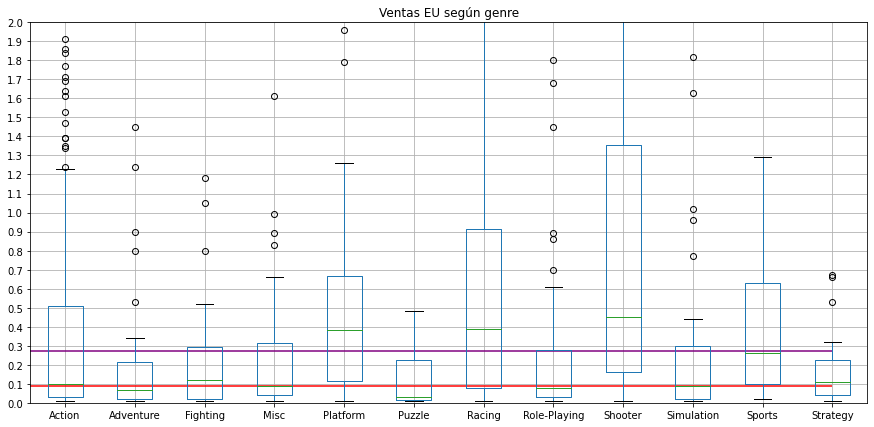

In [182]:
games_4_eu.pivot_table(index='name', columns='genre', values='eu_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,2)
plt.yticks((np.arange(0, 2.01, step=0.1)))
# Marquemos la mediana en rojo
plt.hlines(0.09, xmin=0.5,xmax=12, color='red')
# Marquemos la media en morado
plt.hlines(0.27, xmin=0.5,xmax=12, color='purple')
plt.title('Ventas EU según genre')
plt.show()

#### Conclusión
<font color=green>
Podemos observar que el usuario en EU prefiere la PS4, seguido de la PS3, X360, Wii a lo que se refiere en plataformas. En género el shooter lleva más preferencia, pero no por mucho. Seguido por Racing y Platform. Siguiéndole Sports.
</font>

### JP

In [183]:
games_4['jp_sales'].describe()

count    2242.000000
mean        0.062846
std         0.233552
min         0.000000
25%         0.000000
50%         0.010000
75%         0.050000
max         4.350000
Name: jp_sales, dtype: float64

<font color=green>
Tenemos varios valores ausentes. Ya que hay juegos que no se han vendido en JP. No tomaremos en cuenta estos valores, ya que cambiarán los resultados de nuestro análisis.
</font>

In [184]:
games_4_jp = games_4[games_4['jp_sales']!=0]
print(f'Porcentaje de juegos lanzados en JP:', len(games_4_jp)*100/len(games_4),'%')

Porcentaje de juegos lanzados en JP: 53.07760927743087 %


In [185]:
games_4_jp['jp_sales'].describe()

count    1190.000000
mean        0.118403
std         0.310201
min         0.010000
25%         0.020000
50%         0.050000
75%         0.100000
max         4.350000
Name: jp_sales, dtype: float64

In [186]:
#filtrado por plataforma
games_4_jp.pivot_table(index='name', columns='platform', values='jp_sales', aggfunc='sum').describe()

platform,3DS,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,237.000000,236.000000,223.000000,66.000000,317.000000,1.00,57.000000,31.000000,22.000000
mean,0.286329,0.098941,0.071570,0.049848,0.058864,0.05,0.190877,0.016452,0.015455
std,0.626804,0.119784,0.078687,0.057177,0.077611,NaN,0.306683,0.012530,0.009117
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.05,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.020000,0.012500,0.020000,0.05,0.030000,0.010000,0.010000
50%,0.080000,0.050000,0.050000,0.020000,0.030000,0.05,0.090000,0.010000,0.010000
75%,0.190000,0.130000,0.080000,0.057500,0.070000,0.05,0.170000,0.020000,0.020000
max,4.350000,0.980000,0.490000,0.240000,0.900000,0.05,1.460000,0.060000,0.040000


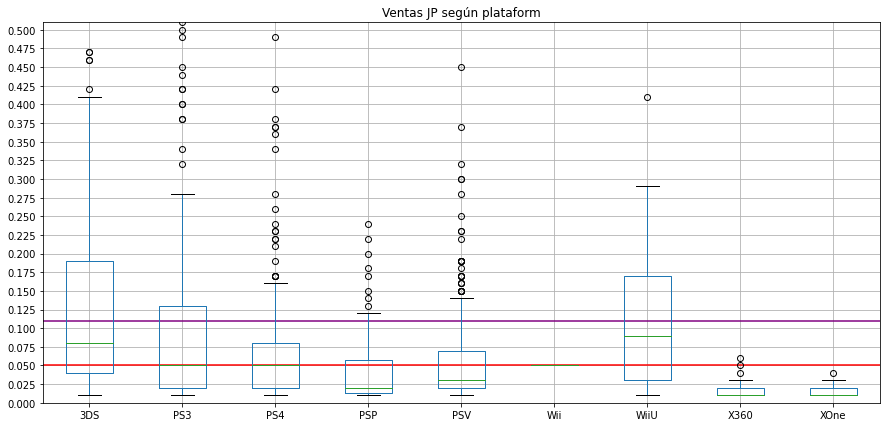

In [187]:
games_4_jp.pivot_table(index='name', columns='platform', values='jp_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,0.51)
plt.yticks((np.arange(0, 0.51, step=0.025)))
# Marquemos la mediana en rojo
plt.hlines(0.05, xmin=0.5,xmax=9.5, color='red')
# Marquemos la media en morado
plt.hlines(0.11, xmin=0.5,xmax=9.5, color='purple')
plt.title('Ventas JP según plataform')
plt.show()

In [188]:
#filtrado por genero
games_4_jp.pivot_table(index='name', columns='genre', values='jp_sales', aggfunc='sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,286.000000,145.000000,42.000000,78.000000,25.000000,6.000000,21.000000,190.000000,45.000000,20.000000,36.000000,20.000000
mean,0.141573,0.040138,0.182143,0.117949,0.191600,0.196667,0.109524,0.269158,0.146889,0.226000,0.150833,0.088500
std,0.277542,0.063333,0.494642,0.188827,0.265341,0.097502,0.280918,0.606694,0.236738,0.498021,0.137371,0.095105
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.070000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.020000,0.010000,0.032500,0.030000,0.030000,0.130000,0.010000,0.050000,0.030000,0.030000,0.040000,0.020000
50%,0.060000,0.020000,0.080000,0.070000,0.060000,0.205000,0.030000,0.085000,0.060000,0.040000,0.120000,0.055000
75%,0.140000,0.040000,0.155000,0.130000,0.200000,0.242500,0.050000,0.197500,0.190000,0.105000,0.202500,0.107500
max,2.790000,0.530000,3.240000,1.240000,0.940000,0.340000,1.280000,4.350000,1.460000,1.900000,0.530000,0.320000


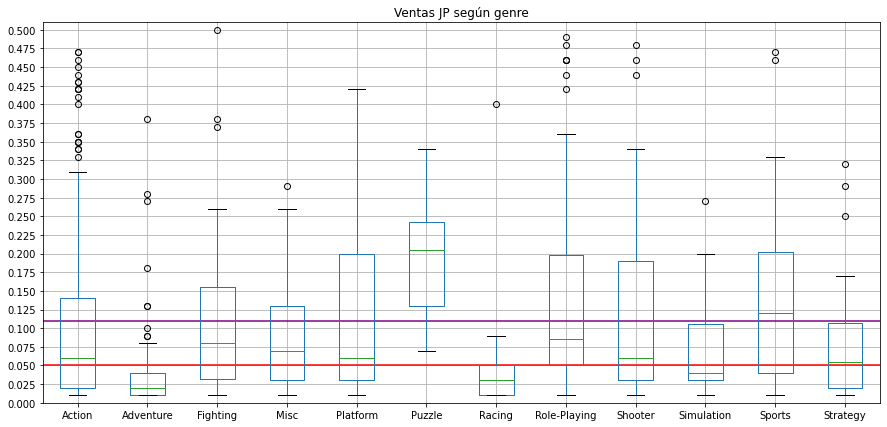

In [189]:
games_4_jp.pivot_table(index='name', columns='genre', values='jp_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,0.51)
plt.yticks((np.arange(0, 0.51, step=0.025)))
# Marquemos la mediana en rojo
plt.hlines(0.05, xmin=0.5,xmax=12.5, color='red')
# Marquemos la media en morado
plt.hlines(0.11, xmin=0.5,xmax=12.5, color='purple')
plt.title('Ventas JP según genre')
plt.show()

#### Conclusión
<font color=green>
En JP observamos algo diferente comparado con los otros países. JP no tiene una venta de gran diferente entre plataformas. Siendo la WiiU levenemente más vedida que la 3DS. Teniendo más ventas atípica la PS4 y la PSV. En el género, también tenemos un gusto notoriamente diferente, por los Puzzle. Seguido por los Role-Playing, Fighting y Misc. Siendo bastante más bajo el Shooter, Action y Platform, comparado con las otras dos regiones, que no aparecieron los gustos de JP (Puzzle y Role-Playing)
</font>

### ESRB
<font color=green>
Compararemos la clasificación ESRB y como afecta las ventas en cada región
</font

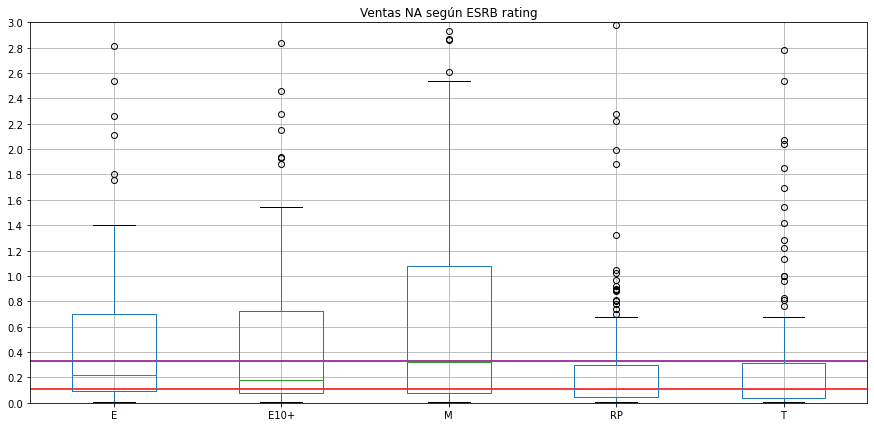

In [190]:
games_4_na.pivot_table(index='name', columns='rating', values='na_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,1)
plt.yticks((np.arange(0, 3.1, step=0.2)))
# Marquemos la mediana en rojo
plt.hlines(0.11, xmin=0.5,xmax=5.5, color='red')
# Marquemos la media en morado
plt.hlines(0.33, xmin=0.5,xmax=5.5, color='purple')
plt.title('Ventas NA según ESRB rating')
plt.show()

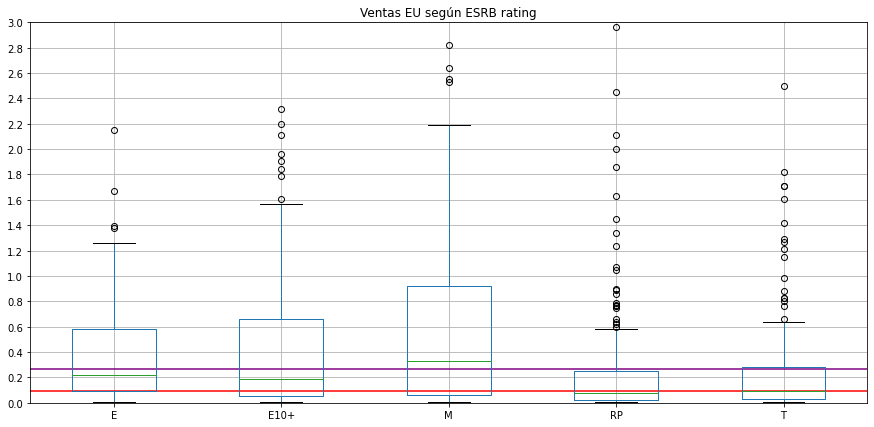

In [191]:
games_4_eu.pivot_table(index='name', columns='rating', values='eu_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.yticks((np.arange(0, 3.1, step=0.2)))
plt.ylim(0,3)
# Marquemos la mediana en rojo
plt.hlines(0.09, xmin=0.5,xmax=5.5, color='red')
# Marquemos la media en morado
plt.hlines(0.27, xmin=0.5,xmax=5.5, color='purple')
plt.title('Ventas EU según ESRB rating')
plt.show()

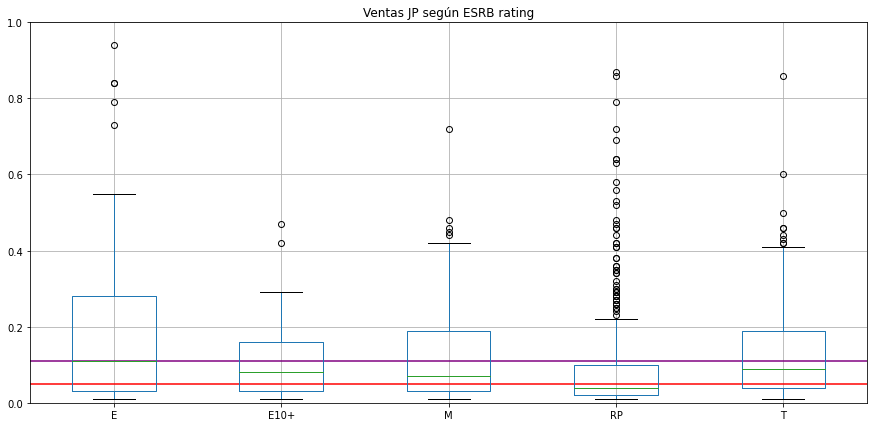

In [192]:
games_4_jp.pivot_table(index='name', columns='rating', values='jp_sales', aggfunc='sum').boxplot(figsize=(15,7))
plt.ylim(0,0.51)
plt.yticks((np.arange(0, 1.1, step=0.2)))
# Marquemos la mediana en rojo
plt.hlines(0.05, xmin=0.5,xmax=5.5, color='red')
# Marquemos la media en morado
plt.hlines(0.11, xmin=0.5,xmax=5.5, color='purple')
plt.title('Ventas JP según ESRB rating')
plt.show()

#### Conclusión
<font color=green>
Al fijarnos en el rating de ESRB, podemos ver que tanto en NA como en EU tienen un comportamiento similar. Existiendo una preferencia por los juegos clasificados como M (Mature). En cambio JP se comporta diferente, teniendo una mayor preferencia por los juegos clasificados como E (Everyone). De todas formas, los juegos clasificado como RP (Rating Pending) resultan tener ventas atípicas de mayor volumen en JP.     
    
La diferencia de ventas de rating, pudiese deberse por tema de cultura y preferencia según la región.

</font>

## Comprobación de hipótesis
<font color=green>
En esta sección comprobaremos las hipótesis. 
Consideraremos un alpha de 5%. 
Para poder considerar que cada platform y genre se comporta de manera diferente, utilizaremos el método ttest.ind()

</font>

### Hipótesis 1
<font color=green>
Comprobaremos que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
</font>

<font color=green>
H0: Las clasificaciones promedios son las mismos
    
H1: Las clasificaciones promedio no son las mismos
</font>

In [193]:
games_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2242 non-null   object 
 1   platform         2242 non-null   object 
 2   year_of_release  2242 non-null   float64
 3   genre            2242 non-null   object 
 4   na_sales         2242 non-null   float64
 5   eu_sales         2242 non-null   float64
 6   jp_sales         2242 non-null   float64
 7   other_sales      2242 non-null   float64
 8   total_sales      2242 non-null   float64
 9   critic_score     1329 non-null   float64
 10  user_score       1373 non-null   float64
 11  rating           2242 non-null   object 
dtypes: float64(8), object(4)
memory usage: 210.3+ KB


In [194]:
games_4_no_nan = games_4.dropna()
games_4_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 2235
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1320 non-null   object 
 1   platform         1320 non-null   object 
 2   year_of_release  1320 non-null   float64
 3   genre            1320 non-null   object 
 4   na_sales         1320 non-null   float64
 5   eu_sales         1320 non-null   float64
 6   jp_sales         1320 non-null   float64
 7   other_sales      1320 non-null   float64
 8   total_sales      1320 non-null   float64
 9   critic_score     1320 non-null   float64
 10  user_score       1320 non-null   float64
 11  rating           1320 non-null   object 
dtypes: float64(8), object(4)
memory usage: 134.1+ KB


In [195]:
# El valor alhpa es 5%
alpha = 0.05

#tomamos nuestras dos muestras
sample_1 = games_4_no_nan[games_4_no_nan['platform'] =='XOne']['user_score']
sample_2 = games_4_no_nan[games_4_no_nan['platform'] == 'PC']['user_score']

#realizamos el test
results = st.ttest_ind(sample_1,sample_2)

#imprimamos el restultado
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value:  0.03756514569211024
Rechazamos la hipótesis nula


### Hipótesis 2
<font color=green>
Comprobaremos que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
</font>

<font color=green>
H0: Las clasificaciones promedios son las mismos
    
H1: Las clasificaciones promedio no son las mismos
</font>

In [196]:
# Fijamos el valor de alpha
alpha = 0.05

# Fijamos las muestras
sample1 = games_4_no_nan[games_4_no_nan['genre']=='Action']['user_score']
sample2 = games_4_no_nan[games_4_no_nan['genre']=='Sports']['user_score']

# Realizamos el test
results = st.ttest_ind(sample1, sample2)

# Vemos el resultado
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')



p-value: 9.611086800156234e-34
Rechazamos la hipótesis nula


# Conclusión General 

<font color=green>

Para este proyecto, recibimos los datos de ventas de juegos hasta el 2016, estas ventas son de diferentes zonas y plataformas y títulos de juegos. Antes de empezar nuestro análisis principal, realizamos un pre análisis de los datos, encontrandonos con datos faltantes que pudimos llenar con la mayor información disponible, cambiar los tipos de datos para poder ejecutar de mejor manera los pasos siguientes.

Teniendo un conjunto de datos listo y confiable, comenzamos con nuestro análisis. Encontrando que las plataformas suelen tener una vida de aprox 11 años, pero teniendo más ventas altas en sus primeros años y posterior un descenso constante hasta desaparecer. Esto también influyendo en el lanzamiento de nuevas plataformas de las mismas grandes empresas. 

También pudimos analizar que las calificaciones ESRB de los juegos no afecta la venta de un juego, pero sí pudimos observar que hay preferencia hacia ciertas calificaciones, dependiendo de la zona geográfica. Siendo estos, por ejemplo, los Shooter, Platform y Racing para dos zonas, en cambio para otra zona sobresalió Puzzle. 

Además, pudimos observar que en dos zonas (NA, EU) tienen de preferencia dos consolas; PS4 y XOne, en cambio en una zona (JP) prefieren la 3DS o WiiU. Existiendo también una plataforma duradera, de aprox 30 años de duración, que es el PC.

Tomando en cuenta los datos analizados, podríamos concluir que para determinar si un juego tiene éxito o no, habría que considerar primer la zona en la que se lanzará la nueva campaña publicitaria, a cuál plataforma irá dirigido y qué género se utilizará. También se podría analizar el lanzamiento de una nueva plataforma, ya que las actuales están en decaimiento de ventas y podría resultar útil en volver a aumentar las ventas con la nueva plataforma.
</font>